# Project objective

The mian objective of this project is to understand how can using TensorFlow2 to build SMS spam detection model. Particularly, I will build a binary classification model to detect whether a text message is spam or not (ham). Moreover, I will learn how to implement Dense, Long Short Term Memory (LSTM) and Bidirectional-LSTM (Bi-LSTM) Deep Learning models in TensorFlow2 Keras API.

I will use Dense text classifier , LSTM and Bi-LSTM and compare these methods in terms of performance and finally select one of them.

## Steps in project

- Loading and exploring the spam data
- Preparing train data and test data
- Text minning by NLP techniques
- Training the spam detection model using the three approaches mentioned above
- Comparing and selecting a final model
- Making prediction to using the final trained classifier to classify the new messages

## Loading and exploring the spam data

### Importing required packages and libraries

In [152]:
# libraries for reading data, exploring and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# function that renders the figure in a notebook (instead of displaying a dump of the figure object)
%matplotlib inline

# library for train test split
import sklearn
from sklearn.model_selection import train_test_split

# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# modeling
from tensorflow.keras.callbacks import History
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

### Reading and exploring data

In [9]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data = data.rename(columns={'v1':'label', 'v2':'message'})

In [11]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

* There are 4825 ham messages compared to 747 spam messages so this indicates the imbalanced data
* the number of records in the message column is 5572, of which 402 are duplicates
    * 309 duplicates in ham messages
    * 94 duplicates in spam messages
* the most frequent message in ham occurs 30 times and in spam 4 times

In [19]:
duplicates_mess = data[data.duplicated()]
duplicates_mess.head()

,label,message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls


In [53]:
# create a separate dataframe for ham and spam message

spam_mess = data[data.label=='spam']
ham_mess = data[data.label=='ham']

In [54]:
spam_mess.head()

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [55]:
ham_mess.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


### Visualizing the most frequent words in the given text by Word Cloud

In [56]:
# converting spam and ham messages to numpy array and to list

spam_mess_txt = ' '.join(spam_mess.message.to_numpy().tolist())
ham_mess_txt = ' '.join(ham_mess.message.to_numpy().tolist())

In [57]:
spam_mess_txt[:500]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U"

In [58]:
ham_mess_txt[:500]

"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I'm gon"

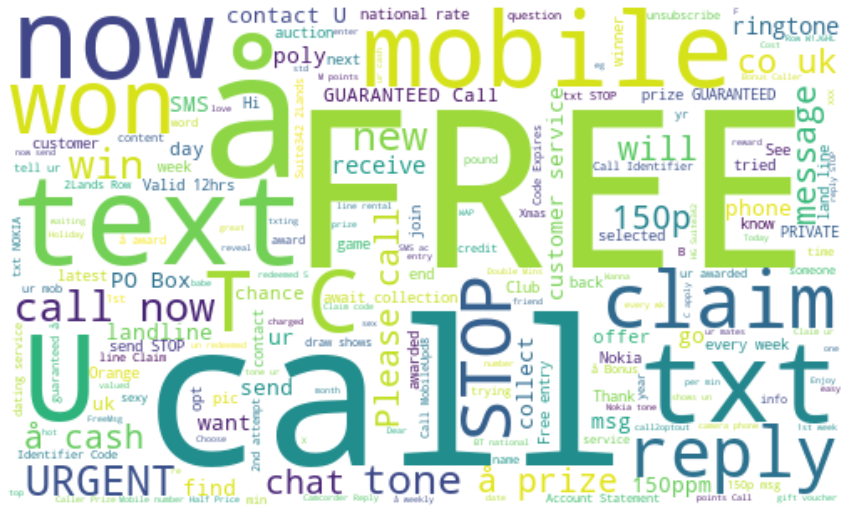

In [59]:
# wordcloud of spam messages without stop words

spam_mess_cloud = WordCloud(width=500, height=300,
                           stopwords=STOPWORDS,
                            max_words=600,
                            background_color='white').generate(spam_mess_txt)
plt.figure(figsize=(15,10))
plt.imshow(spam_mess_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


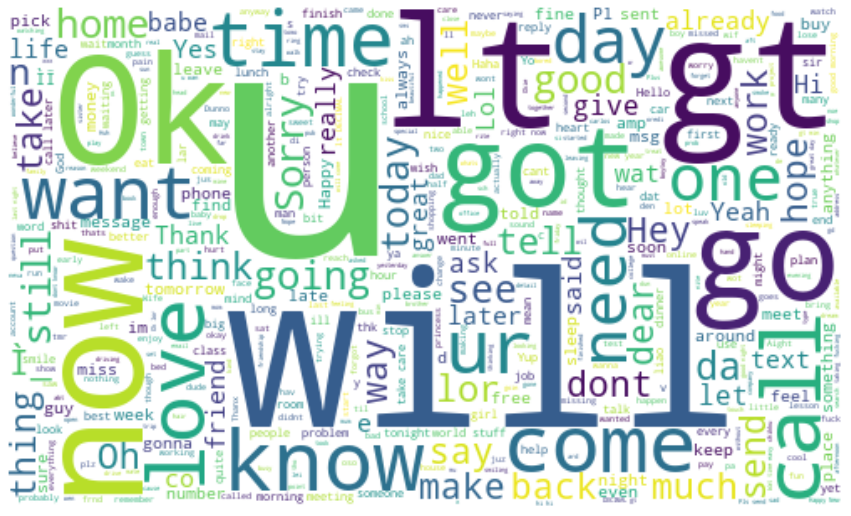

In [60]:
# wordcloud of ham messages without stop words

ham_mess_cloud = WordCloud(width=500, height=300,
                          stopwords=STOPWORDS,
                          max_words=600,
                          background_color='white').generate(ham_mess_txt)
plt.figure(figsize=(15,10))
plt.imshow(ham_mess_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Comparison spam and ham messages

<AxesSubplot:xlabel='label', ylabel='count'>

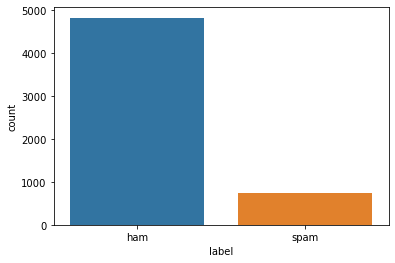

In [78]:
sns.countplot(x=data.label)

In [79]:
len(spam_mess)

747

In [82]:
len(spam_mess)/(len(data.message))

0.13406317300789664

In [80]:
len(ham_mess)

4825

In [83]:
len(ham_mess)/(len(data.message))

0.8659368269921034

the above graph shows a clear disproportion between spam and ham messages (13% to 87%)

### Solving the class inequality by downsampling

Downsampling is a process where could randomly delete some of the observations from the majority class so that the numbers in majority and minority classes are matched. 

In my case I have downsampled the ham messages (majority class). 

There are now 747 messages in each class.

In [84]:
len(ham_mess)

4825

In [85]:
ham_mess_ds = ham_mess.sample(n=len(spam_mess), random_state=1)
spam_mess_ds = spam_mess

In [92]:
print('len ham_mess_ds: {}'.format(len(ham_mess_ds)))
print('len spam_mess_ds: {}'.format(len(spam_mess_ds)))

len ham_mess_ds: 747
len spam_mess_ds: 747


In [94]:
print(ham_mess_ds.shape, spam_mess_ds.shape)

(747, 2) (747, 2)


### creating data frame with spam and ham messages after downsampling

In [110]:
mess_df = ham_mess_ds.append(spam_mess_ds).reset_index(drop=True)
mess_df.head()

,label,message
0,ham,Can you pls pls send me a mail on all you know...
1,ham,"Yeah, probably but not sure. Ilol let u know, ..."
2,ham,Were gonna go get some tacos
3,ham,Hi. Hope you had a good day. Have a better night.
4,ham,How much r Ì_ willing to pay?


Text(0.5, 0, 'type of messsages')

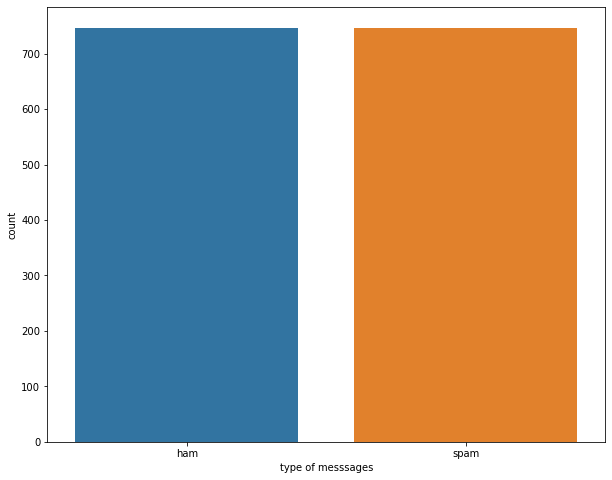

In [111]:
plt.figure(figsize=(10,8))
sns.countplot(x=mess_df.label)
plt.xlabel('type of messsages')

### Getting information about length of messages text

In [113]:
mess_df['mess_length'] = mess_df['message'].apply(len)

In [114]:
mess_df.head()

,label,message,mess_length
0,ham,Can you pls pls send me a mail on all you know...,155
1,ham,"Yeah, probably but not sure. Ilol let u know, ...",124
2,ham,Were gonna go get some tacos,28
3,ham,Hi. Hope you had a good day. Have a better night.,49
4,ham,How much r Ì_ willing to pay?,29


In [115]:
mess_df.groupby('label').mean()

,mess_length
label,
ham,70.145917
spam,138.866131


## Preparing train data and test data

### Converting the text label to numeric and splitting the data into training set and testing set

In [117]:
# mapping ham label as 0 and spam as 1
mess_df['mess_type'] = mess_df['label'].map({'spam':1, 'ham':0})
mess_df.head()

,label,message,mess_length,mess_type
0,ham,Can you pls pls send me a mail on all you know...,155,0
1,ham,"Yeah, probably but not sure. Ilol let u know, ...",124,0
2,ham,Were gonna go get some tacos,28,0
3,ham,Hi. Hope you had a good day. Have a better night.,49,0
4,ham,How much r Ì_ willing to pay?,29,0


In [119]:
mess_label = mess_df['mess_type'].values
mess_label

array([0, 0, 0, ..., 1, 1, 1])

In [121]:
# splitting data into train and test

train_mess, test_mess, train_labels, test_labels = train_test_split(mess_df['message'], 
                                                                    mess_label,
                                                                    test_size=0.2,
                                                                   random_state=1)

In [125]:
train_mess.shape

(1195,)

In [126]:
test_mess.shape

(299,)

In [127]:
train_labels.shape

(1195,)

In [128]:
test_labels.shape

(299,)

## Text pre processing

### Tokenization

Machine Learning and Deep Learning models do not understand text. It is a string of insignificant characters for them.
Therefore it is necessary to convert words to numbers.

In [130]:
# defining pre-processing hyperparameters

max_len = 50          # maximum length of all sequences
trunc_type = "post"   # truncatting at the end of the sequences
padding_type = "post" # padding after each sequence
oov_tok = "<OOV>"     # this is used to replace out of vocabulary words in corpus
words_size = 500      # unique words to load in training and testing data

In [131]:
tokenizer = Tokenizer(num_words=words_size,
                     oov_token=oov_tok,
                     char_level=False)

In [133]:
tokenizer

In [134]:
tokenizer.fit_on_texts(train_mess)

In [144]:
word_index = tokenizer.word_index
# print(word_index)

print('there are {} unique tokens in training data'.format (len(word_index)))

there are 4093 unique tokens in training data


### Sequencing and Padding

representing each sentence by sequences of numbers

In [145]:
# training data
train_sequences = tokenizer.texts_to_sequences(train_mess)
train_padded = pad_sequences(sequences=train_sequences,
                            maxlen=max_len,
                            padding=padding_type,
                            truncating=trunc_type)

# testing data
test_sequences = tokenizer.texts_to_sequences(test_mess)
test_padded = pad_sequences(sequences=test_sequences,
                           maxlen=max_len,
                           padding=padding_type,
                           truncating=trunc_type)

#### before padding

In [150]:
print(len(train_sequences[0]), len(train_sequences[1]), len(train_sequences[2]))

28 7 7


#### after padding

In [151]:
print(len(train_padded[0]), len(train_padded[1]), len(train_padded[2]))

50 50 50


After the padding was applied, each of sequences have length of 50

In [147]:
print(train_padded.shape)
train_padded

(1195, 50)


array([[448,  11, 313, ...,   0,   0,   0],
       [ 33,  46,   4, ...,   0,   0,   0],
       [  1,   1, 219, ...,   0,   0,   0],
       ...,
       [ 27, 105,  11, ...,   0,   0,   0],
       [ 27,  11,  61, ...,   0,   0,   0],
       [  1,  29,   1, ...,   0,   0,   0]], dtype=int32)

In [148]:
print(test_padded.shape)
test_padded

(299, 50)


array([[119, 369,  10, ...,   0,   0,   0],
       [ 95,  30,   1, ...,   0,   0,   0],
       [  1, 489,  18, ...,   0,   0,   0],
       ...,
       [106,   1,   1, ...,   0,   0,   0],
       [  1,   1, 123, ...,   0,   0,   0],
       [480,   1, 125, ...,   0,   0,   0]], dtype=int32)

## Training the spam detection model

### Dense Model

In [210]:
# defining pre-processing hyperparameters

max_len = 50
words_size = 500
embeding_dim = 16

In [211]:
# Dense model architecture

model = Sequential()

model.add(Embedding(words_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 25        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________


In [212]:
# model compiling

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

EarlyStopping(monitor=’val_loss’, patience=4) is used to define that we want to monitor the validation loss and if the validation loss is not improved after four epochs, then the model training is stopped.

In [213]:
# model fitting

early_stop = EarlyStopping(monitor='val_loss', patience=4)

history = model.fit(train_padded, train_labels, 
                    epochs=40, 
                    validation_data=(test_padded, test_labels),
                   callbacks=[early_stop], verbose=2)

Epoch 1/40
38/38 - 1s - loss: 0.6839 - accuracy: 0.5046 - val_loss: 0.6750 - val_accuracy: 0.5184
Epoch 2/40
38/38 - 0s - loss: 0.6588 - accuracy: 0.6351 - val_loss: 0.6391 - val_accuracy: 0.7592
Epoch 3/40
38/38 - 0s - loss: 0.6077 - accuracy: 0.8159 - val_loss: 0.5748 - val_accuracy: 0.8328
Epoch 4/40
38/38 - 0s - loss: 0.5342 - accuracy: 0.8703 - val_loss: 0.4961 - val_accuracy: 0.8629
Epoch 5/40
38/38 - 0s - loss: 0.4499 - accuracy: 0.8895 - val_loss: 0.4187 - val_accuracy: 0.8863
Epoch 6/40
38/38 - 0s - loss: 0.3814 - accuracy: 0.8954 - val_loss: 0.3499 - val_accuracy: 0.8896
Epoch 7/40
38/38 - 0s - loss: 0.3160 - accuracy: 0.9105 - val_loss: 0.2965 - val_accuracy: 0.8997
Epoch 8/40
38/38 - 0s - loss: 0.2650 - accuracy: 0.9238 - val_loss: 0.2532 - val_accuracy: 0.9130
Epoch 9/40
38/38 - 0s - loss: 0.2255 - accuracy: 0.9289 - val_loss: 0.2185 - val_accuracy: 0.9231
Epoch 10/40
38/38 - 0s - loss: 0.1986 - accuracy: 0.9423 - val_loss: 0.1907 - val_accuracy: 0.9398
Epoch 11/40
38/38 -

The model fitting has stopped at epoch 26 after 23 epoch because validation loss was increased and not improved

In [214]:
# Model performance on test data 
model.evaluate(test_padded, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 0.1198 - accuracy: 0.9666


[0.11984722316265106, 0.9665551781654358]

### Visualizing the history results by plotting loss and accuracy by number of epochs

In [165]:
history

In [167]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.691512,0.578243,0.685352,0.866221
1,0.675290,0.853557,0.660559,0.866221
2,0.636890,0.874477,0.607476,0.886288
3,0.568186,0.885356,0.522452,0.889632
4,0.472172,0.898745,0.424328,0.896321
5,0.374754,0.912971,0.334387,0.903010
6,0.296904,0.919665,0.268710,0.909699
7,0.238020,0.933891,0.224607,0.929766
8,0.202158,0.938912,0.193575,0.939799
9,0.171886,0.954812,0.170425,0.946488


In [169]:
metrics.rename(columns={'loss':'training_loss',
                       'accuracy':'training_accuracy',
                       'val_loss':'validation_loss',
                       'val_accuracy':'validation_accuracy'}, inplace=True)

In [170]:
metrics

,training_loss,training_accuracy,validation_loss,validation_accuracy
0,0.691512,0.578243,0.685352,0.866221
1,0.675290,0.853557,0.660559,0.866221
2,0.636890,0.874477,0.607476,0.886288
3,0.568186,0.885356,0.522452,0.889632
4,0.472172,0.898745,0.424328,0.896321
5,0.374754,0.912971,0.334387,0.903010
6,0.296904,0.919665,0.268710,0.909699
7,0.238020,0.933891,0.224607,0.929766
8,0.202158,0.938912,0.193575,0.939799
9,0.171886,0.954812,0.170425,0.946488


In [173]:
def graf_1(val1, val2, sign):
    metrics[[val1, val2]].plot()
    plt.ylabel(sign)
    plt.xlabel('number of epochs')
    plt.title('training and validation' + sign)
    plt.legend([val1, val2])

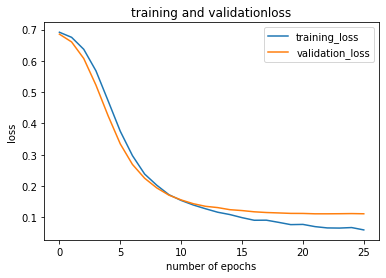

In [174]:
# loss

graf_1('training_loss', 'validation_loss', 'loss')

- The loss is decreasing as the number of epochs increases
- The validation loss is higher than training loss after around 5 epochs and the difference is more pronounced with increase in epochs.

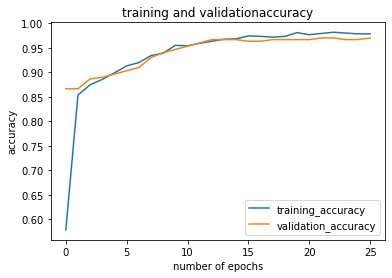

In [175]:
# accuracy

graf_1('training_accuracy', 'validation_accuracy', 'accuracy')

- The accuracy is increasing over epochs. 
- The model is performing better in training set than the validation set. 
- If the model performs very well on training data however, its performance is worse in testing data, then it is an indication of overfitting. 
- In this model, we don’t see a significant issue with over-fitting. 
- Moreover, I have accounted for over-fitting problem by using dropout layer and callback earlier.

## Long Short Term Memory (LSTM) Model

In [177]:
# LSTM hyperparameters

n_lstm = 20
max_len = 50
words_size = 500
embeding_dim = 16

In [181]:
# LSTM Spam detection architecture

model1 = Sequential()
model1.add(Embedding(words_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm,
               dropout=0.2,
               return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))

In [182]:
# Compiling the LSTM model

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [183]:
# model fitting

early_stop = EarlyStopping(monitor='val_loss', patience=4)

history = model1.fit(train_padded, train_labels, 
                    epochs=40, 
                    validation_data=(test_padded, test_labels),
                   callbacks=[early_stop], verbose=2)

Epoch 1/40
38/38 - 3s - loss: 0.6775 - accuracy: 0.6238 - val_loss: 0.6303 - val_accuracy: 0.6686
Epoch 2/40
38/38 - 0s - loss: 0.4396 - accuracy: 0.8330 - val_loss: 0.2952 - val_accuracy: 0.9187
Epoch 3/40
38/38 - 0s - loss: 0.2856 - accuracy: 0.9198 - val_loss: 0.2596 - val_accuracy: 0.9219
Epoch 4/40
38/38 - 1s - loss: 0.2451 - accuracy: 0.9329 - val_loss: 0.2397 - val_accuracy: 0.9281
Epoch 5/40
38/38 - 0s - loss: 0.2086 - accuracy: 0.9433 - val_loss: 0.2447 - val_accuracy: 0.9221
Epoch 6/40
38/38 - 0s - loss: 0.1885 - accuracy: 0.9487 - val_loss: 0.2317 - val_accuracy: 0.9262
Epoch 7/40
38/38 - 1s - loss: 0.1703 - accuracy: 0.9542 - val_loss: 0.2165 - val_accuracy: 0.9338
Epoch 8/40
38/38 - 0s - loss: 0.1582 - accuracy: 0.9573 - val_loss: 0.2066 - val_accuracy: 0.9369
Epoch 9/40
38/38 - 0s - loss: 0.1511 - accuracy: 0.9596 - val_loss: 0.1994 - val_accuracy: 0.9386
Epoch 10/40
38/38 - 0s - loss: 0.1420 - accuracy: 0.9617 - val_loss: 0.2009 - val_accuracy: 0.9369
Epoch 11/40
38/38 -

In [184]:
# Model performance on test data 

model1.evaluate(test_padded, test_labels)

10/10 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.9405


[0.19566988945007324, 0.9405350089073181]

In [185]:
metrics = pd.DataFrame(history.history)

metrics.rename(columns={'loss':'training_loss',
                       'accuracy':'training_accuracy',
                       'val_loss':'validation_loss',
                       'val_accuracy':'validation_accuracy'}, inplace=True)

In [186]:
def graf_1(val1, val2, sign):
    metrics[[val1, val2]].plot()
    plt.ylabel(sign)
    plt.xlabel('number of epochs')
    plt.title('LSTM model training and validation' + sign)
    plt.legend([val1, val2])

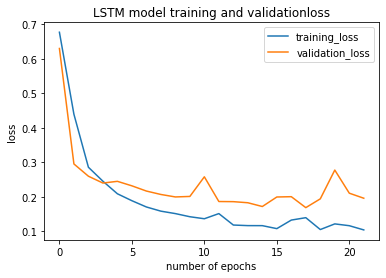

In [187]:
# loss

graf_1('training_loss', 'validation_loss', 'loss')

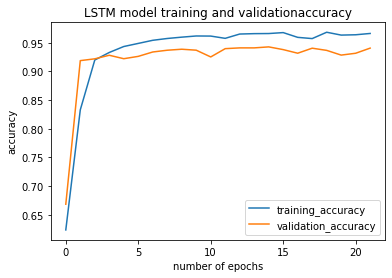

In [188]:
# accuracy

graf_1('training_accuracy', 'validation_accuracy', 'accuracy')

## Bi-directional Long Short Term Memory (BiLSTM) Model

In [189]:
# Biderectional LSTM Spam detection architecture

model2 = Sequential()
model2.add(Embedding(words_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm, dropout=0.2, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))

In [190]:
# Compiling the LSTM model

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [191]:
# model fitting

early_stop = EarlyStopping(monitor='val_loss', patience=4)

history = model2.fit(train_padded, train_labels, 
                    epochs=40, 
                    validation_data=(test_padded, test_labels),
                   callbacks=[early_stop], verbose=2)

Epoch 1/40
38/38 - 4s - loss: 0.6766 - accuracy: 0.5745 - val_loss: 0.6314 - val_accuracy: 0.6722
Epoch 2/40
38/38 - 1s - loss: 0.4506 - accuracy: 0.8564 - val_loss: 0.3025 - val_accuracy: 0.9234
Epoch 3/40
38/38 - 1s - loss: 0.2864 - accuracy: 0.9145 - val_loss: 0.2389 - val_accuracy: 0.9357
Epoch 4/40
38/38 - 1s - loss: 0.2190 - accuracy: 0.9382 - val_loss: 0.2108 - val_accuracy: 0.9336
Epoch 5/40
38/38 - 1s - loss: 0.1590 - accuracy: 0.9576 - val_loss: 0.1731 - val_accuracy: 0.9500
Epoch 6/40
38/38 - 1s - loss: 0.1316 - accuracy: 0.9656 - val_loss: 0.1539 - val_accuracy: 0.9544
Epoch 7/40
38/38 - 1s - loss: 0.1206 - accuracy: 0.9665 - val_loss: 0.1462 - val_accuracy: 0.9602
Epoch 8/40
38/38 - 0s - loss: 0.1002 - accuracy: 0.9758 - val_loss: 0.1506 - val_accuracy: 0.9587
Epoch 9/40
38/38 - 0s - loss: 0.0871 - accuracy: 0.9790 - val_loss: 0.1379 - val_accuracy: 0.9617
Epoch 10/40
38/38 - 0s - loss: 0.0821 - accuracy: 0.9798 - val_loss: 0.1350 - val_accuracy: 0.9635
Epoch 11/40
38/38 -

In [192]:
# Model performance on test data 

model2.evaluate(test_padded, test_labels)

10/10 [==============================] - 0s 3ms/step - loss: 0.1268 - accuracy: 0.9679


[0.1267676055431366, 0.9678930640220642]

In [193]:
metrics = pd.DataFrame(history.history)

metrics.rename(columns={'loss':'training_loss',
                       'accuracy':'training_accuracy',
                       'val_loss':'validation_loss',
                       'val_accuracy':'validation_accuracy'}, inplace=True)

In [194]:
def graf_1(val1, val2, sign):
    metrics[[val1, val2]].plot()
    plt.ylabel(sign)
    plt.xlabel('number of epochs')
    plt.title('BiLSTM model training and validation' + sign)
    plt.legend([val1, val2])

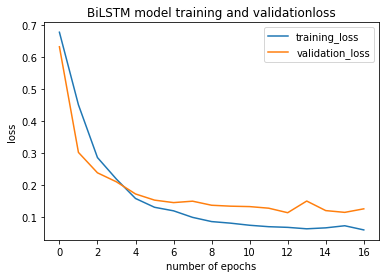

In [195]:
# loss

graf_1('training_loss', 'validation_loss', 'loss')

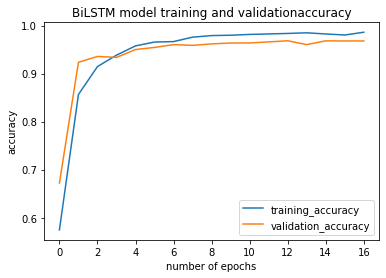

In [196]:
# accuracy

graf_1('training_accuracy', 'validation_accuracy', 'accuracy')

## Comparing three different models and select a final one

In [197]:
# Comparing three different models

print(f"Dense architecture loss and accuracy: {model.evaluate(test_padded, test_labels)} " )
print(f"LSTM architecture loss and accuracy: {model1.evaluate(test_padded, test_labels)} " )
print(f"Bi-LSTM architecture loss and accuracy: {model2.evaluate(test_padded, test_labels)} " )

10/10 [==============================] - 0s 864us/step - loss: 0.1110 - accuracy: 0.9699
Dense architecture loss and accuracy: [0.11097431182861328, 0.9698996543884277] 
10/10 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.9405
LSTM architecture loss and accuracy: [0.19566988945007324, 0.9405350089073181] 
10/10 [==============================] - 0s 3ms/step - loss: 0.1268 - accuracy: 0.9679
Bi-LSTM architecture loss and accuracy: [0.1267676055431366, 0.9678930640220642] 


* Dense, LSTM and Bi-LSTM models are comparable in terms of loss and accuracy
* The validation loss for these three models are 
    - 0.11 for Dense, 
    - 0.2 for LSTM,
    - 0.13 for BiLSTM
* the validation accuracy are 
    - 0.9699, 
    - 0.9405,
    - 0.9679
* Based on loss, accuracy and the plots above, I select Dense architecture as a final model for classifying the text messages for spam or ham. 
* The dense classifier has simple structure and the loss and accuracy over epochs are more stable than in BiLSTM.

## Predict spam/ham on new messages

### Using exacmple for row text in data

I' ve used the same tokenizer that I created earlier in the code to convert them into the sequences. This makes sure the new words will have the same token as in the training set. Once tokenized, I've used padding as I did earlier and provide the same dimension as in training set.

In [199]:
# take a look for first messages in data sms
data[:3]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [200]:
predict_mess = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [201]:
predict_mess

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [215]:
# defining predict function

def predict_spam(predict_mess):
    seq_mess = tokenizer.texts_to_sequences(predict_mess)
    padded_mess = pad_sequences(seq_mess, maxlen=max_len, padding=padding_type, truncating=trunc_type)
    
    return model.predict(padded_mess)

In [216]:
predict_spam(predict_mess)

array([[0.00997037],
       [0.02084658],
       [0.9994724 ]], dtype=float32)

**Conslusions:**

* in the first dwo messages predcit that message is spam is very low so this is good result, because these messages are not spam
* the third message is spam and the probability is close 100%

### Using own example

In [217]:
predict_mess = ["Hello, I will be late, could you cooking something for me, please?",
               "I'm in work, I couldn't talk with you now",
               "Congratulations! You won new iPhone! Confirm ypur award quickly!!!"]

In [218]:
predict_spam(predict_mess)

array([[0.02640533],
       [0.02094987],
       [0.7017971 ]], dtype=float32)

Model correctly classified both the examples derived from the data and those invented by me.